## Building Linear Neural Networks for Machine Learning Regression

In [2]:
import torch

In [10]:
X = torch.randn(10, 10)
y = torch.randn(10)
X, y

(tensor([[ 0.0105, -0.3524, -0.8405,  0.1248,  1.1378, -0.4270, -1.3653,  1.2809,
          -0.6189,  0.0762],
         [ 0.6146, -0.6661,  0.2844,  2.7747, -2.3469, -0.5257, -0.4112, -0.1374,
          -1.6002, -2.6443],
         [ 0.1022,  0.5095,  0.3900, -1.2284,  2.3054, -0.5433, -0.3673, -1.1440,
          -0.4079,  0.5785],
         [ 0.8475,  1.0511,  0.2029, -0.5822, -1.0615, -1.7253,  0.5514,  1.7176,
           0.7520, -0.6288],
         [-0.2764,  0.6178, -0.4972, -2.1459, -0.7055,  1.5842,  1.6377, -0.6056,
           1.8395, -0.3558],
         [ 0.0044, -0.4361,  0.3105, -0.1385,  0.6621,  1.5718,  0.5231,  0.3330,
           1.4507, -0.4212],
         [ 0.1110,  0.4385,  1.6466, -0.5679, -1.1906, -0.9303, -1.8452,  2.0042,
           0.2904,  0.5847],
         [ 0.5209,  0.0863,  0.9270, -1.7087,  0.2636, -1.4006,  1.3385,  0.0141,
           0.4232,  2.2421],
         [-0.5329, -1.7276,  1.1089, -2.0264,  1.3249,  0.5282,  1.3302,  0.7906,
          -1.2325,  0.1138],
 

In [7]:
import math
import time
import numpy as np
from d2l import torch as d2l

𝑦̂ =𝐰⊤𝐱+𝑏. is the formula for linear regression. Givent that the upper T means a vector multiplication between the weights w and the sample vector x, added to the bias will give the prediction y hat.

𝐲̂ =𝐗𝐰+𝑏, this will give all the predictions of y for all the samples in matrix X. In this case this is a matrix vector multiplication and the value of y is a vector.

The whole point of machine learning is to search for the best parameters w and b, such that given a new unseen sample that has the same distribution as the X matrix the model will be able to accurately predict a value y for the new sample that is not too far from the distribution of y.

𝑙(𝑖)(𝐰,𝑏)=1/2(𝑦̂(𝑖)−𝑦(𝑖))^2 is the loss funtion we use to predict if our model is performing properly in a regression probelm. This is known a squared arror loss

In [ ]:
def squared_error(y_pred, y_actual):
    return 0.5 * ((y_pred - y_actual)**2)

In [ ]:
def mean_squared_error(y_pred, y_actual):
    if(len(y_actual)!=len(y_pred)):
        raise Exception("Length of y_pred and y_actual must be equal")
    
    squared_errors = []
    for i in range(len(y_actual)): 
        squared_errors.append(squared_error(y_pred[i], y_actual[i]))
        
    return sum(squared_errors)/len(squared_errors)

𝐰∗=(𝐗⊤𝐗)−1𝐗⊤𝐲, we can us the analytic solution to fine the appropriate weigts for a give problem, but the analytic solution is so restrictive that it would not suffice for solving the most exciting problems in deep learning

In [18]:
# finding the appropriate weights using the analytical solution

def analystic_solution(X, y):
    solution = torch.mm(X, X)
    solution = torch.linalg.inv(solution)
    solution = solution * (torch.mv(X, y))
    return solution

In [19]:
result = analystic_solution(X, y)
result

tensor([[ 3.9007e+01, -6.2344e+01,  6.4169e+00,  1.6892e+01,  3.9624e+01,
         -9.8062e+00, -8.0019e-01, -2.4872e+01,  1.2526e+00, -1.4920e+01],
        [ 1.0613e+01, -1.8492e+01,  2.8515e+00,  1.5286e+00,  1.0414e+01,
         -6.5795e-01, -4.3969e-02, -6.7103e+00, -9.4963e-02, -3.8291e+00],
        [-2.6523e+00,  4.0194e+00, -3.0021e-01, -1.9942e+00, -2.4172e+00,
          4.7917e-01,  6.5802e-02,  2.2544e+00,  2.8787e-01,  7.5786e-01],
        [-1.2973e+00,  1.9226e+00, -1.6229e-01, -6.0957e-01, -1.2410e+00,
          3.4665e-01,  1.3808e-02,  9.8791e-01, -1.3649e-01,  5.8528e-01],
        [-1.1359e+00,  1.3649e+00, -1.5007e-01,  9.0920e-02, -1.0524e+00,
          5.6368e-01, -5.5252e-02,  5.3290e-01, -1.6425e-01,  4.3980e-01],
        [ 2.2696e+01, -3.7016e+01,  4.4170e+00,  8.0673e+00,  2.2863e+01,
         -4.2856e+00, -3.3882e-01, -1.4580e+01,  3.2476e-01, -8.3744e+00],
        [-6.0228e-01,  7.5568e-01,  2.2478e-01, -1.4045e+00, -8.5432e-01,
          9.9978e-01,  5.0414e-0

In practice the technique for finding the parameters is by gradually adjusting the weights and reducing the loss function, till we reach a point where further adjustment of the weights will not lead to reduction in the loss function result, this iterative process is known as gradient descent, as we are gradually descending the gradient of the loss function to find the lowest possible value for loss function/objective function.

Given the current nature of evaluating our loss function it would mean that we would need to find the loss of every single sample before a single update to the weights, this would be extremely slow, therefore an alternate technique can be used which is to update the gradients after getting the loss for a single sample. Even at that updating the weights has both statistical and performance drawbacks, therefore the solution is to pick the middle ground by breaking the updates into batches. This will lead to minibatch stochastic gradient descent.

The derivative of each weight is the amount it is supposed to change in order to minimize the loss.

Tunable parameters that are not updated in the training loop are called hyperparameters, examples of such are: Learning rate, Batch size etc. They can be tuned automatically by a number of techniques, such as Bayesian optimization. The more formidable task is to find parameters that lead to accurate predictions on previously unseen data, a challenge called generalization. We return to these topics throughout the book.

In [20]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)


In [21]:
c = torch.zeros(n)
t = time.time()

for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.02876 sec'

In [22]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00046 sec'

In [31]:
# time difference in calculating dot product
time.time()
sum = 0
for i in range(n):
    sum += a[i] * b[i]
print(sum)
print(f'{time.time() - t:.5f} sec')

tensor(10000.)
205.39168 sec


In [32]:
time.time()
sum = torch.dot(a,b)
print(sum)
print(f'{time.time() - t:.5f} sec')

tensor(10000.)
206.68560 sec


In [33]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

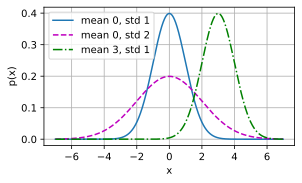

In [34]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

we can think of linear regression as a single-layer fully connected neural network.


## Object Oriented Design for deep learning

In [36]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l


# We will be implementing 3 main classes for our deep learning operations:
# Module: To contain or model, loss, and optimizer
# DataModule: To contain or datasets in a batched format suitable for mini batched gradient descent
# TrainingModule: To combine both the Module and DataModule to perform training of the model based on the data.

In [37]:
# a function that adds an attribute to a class
def add_to_class(Class): #@save
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [38]:
# testing our add to class decorator
class A:
    def __init__(self, b):
        self.b = b

sample = A(3)

In [39]:
@add_to_class(A)
def print_b(self):
    return f"The value of b is {self.b}"

In [40]:
sample.print_b()

'The value of b is 3'

In [54]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


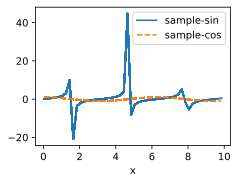

In [49]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.tan(x), 'sample-sin', every_n=2)
    board.draw(x, np.cos(x), 'sample-cos', every_n=2)

In [50]:
class Module(nn.Module, d2l.HyperParameters):
    def __init__(self,
                 plot_train_per_epoch=2,
                 plot_valid_per_epoch=1,
                 *args,
                 **kwargs):
        super().__init__(*args,**kwargs)
        self.save_hyperparameters()
        self.board = d2l.ProgressBoard()
        
    def loss(self, y, y_hat):
        raise NotImplementedError
    
    def forward(self, X):
        assert hasattr(self, "net")
        return self.net(X)
    
    def configure_optimizer(self, optimizer):
        raise NotImplementedError
    
    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l
    
    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)
        return l
    
    def plot(self, key, value, train):
        assert hasattr(self, "trainer")
        self.board.xlabel = "Epoch"
        if train:
            x = self.trainer.train_batch_idx/self.trainer.num_train_batches
            n = self.trainer.num_train_batches/self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / self.plot_valid_per_epoch
    
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(), ("train_" if train else "val_") + key, every_n = int(n))

In [51]:
class DataModule(d2l.HyperParameters):
    def __init__(self,root="./data/", *args, **kwargs):
        self.save_hyperparameters()
        
    def get_dataloaders(self, train=True):
        raise NotImplementedError
    
    def training_dataloaders(self):
        return self.get_dataloaders(train=True)
    
    def validation_dataloaders(self):
        return self.get_dataloaders(train=False)

In [52]:
class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus=0, *args, **kwargs):
        self.save_hyperparameters()
        assert num_gpus == 0 # no current gpu support
    
    def prepare_data(self, data: DataModule):
        self.train_data = data.training_dataloaders()
        self.validation_data = data.validation_dataloaders()
        self.training_data_count = len(self.train_data)
        self.validation_data_count = (len(self.validation_data) if self.validation_data is not None else 0)
    
    def prepare_model(self, model: Module):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model 
        
    def fit_epoch(self):
        raise NotImplementedError
        
    
    def fit(self, model: Module, data: DataModule):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = self.model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        
        for self.epoch in range(self.max_epoch):
            self.fit_epoch()
        

 In particular, it facilitates reusing many components between projects without changing much at all. For instance, we can replace just the optimizer, just the model, just the dataset, etc.; this degree of modularity pays dividends throughout the book in terms of conciseness and simplicity (this is why we added it) and it can do the same for your own projects.

In [61]:
import inspect


class Sample:
    def __init__(self, hello = "Hello"):
        pass
    
    def hyper(self):
        ignore = []
        frame = inspect.currentframe().f_back
        _, _, _, local_vars = inspect.getargvalues(frame)
        self.hparams = {k:v for k, v in local_vars.items()
                        if k not in set(ignore+['self']) and not k.startswith('_')}
        print(self.hparams)
        
        
sample = Sample()
sample.hyper()
                 

{'In': ['', 'X = torch.random(10, 2)\nX', 'import torch', 'X = torch.random(10, 2)\nX', 'X = torch.random(10, 2)\nX', 'X = torch.randn(10, 2)\nX', 'X = torch.randn(10, 2)\ny = torch.randn(10)\nX, y', 'import math\nimport time\nimport numpy as np\nfrom d2l import torch as d2l', '# finding the appropriate weights using the analytical solution\n\ndef analystic_solution(X, y):\n    solution = torch.mm(X, X)\n    solution = torch.linalg.inv(solution)\n    solution = solution * (torch.mv(X, y))\n    return solution', 'result = analystic_solution(X, y)\nresult', 'X = torch.randn(10, 10)\ny = torch.randn(10)\nX, y', 'result = analystic_solution(X, y)\nresult', '# finding the appropriate weights using the analytical solution\n\ndef analystic_solution(X, y):\n    solution = torch.mm(X, X)\n    solution = torch.linalg.inv(solution)\n    solution = solution * (torch.mv(y, X))\n    return solution', 'result = analystic_solution(X, y)\nresult', '# finding the appropriate weights using the analytical

In [62]:
# Building a linear model with synthetic data

class SyntheticRegressionData(d2l.DataModule):
    # synthetic data for linear regression
    def __init__(self,w, b, noise=0.01, num_train =1000, num_val=1000, batch_size=32,  *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        # in generating artificial data, there must be based on a real acheivable set of weights
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise


In [63]:
# generate synthetic data
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [67]:
data.X.shape

torch.Size([2000, 2])

In [66]:
data.y.shape

torch.Size([2000, 1])

In [68]:
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([ 0.6490, -0.1755]) 
label: tensor([6.0927])


In [81]:
# add dataloader attribute
import random

@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train + self.num_val))

    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i:i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]
        
X, y = next(iter(data.get_dataloader(True)))

@d2l.add_to_class(SyntheticRegressionData)
def train_dataloader(self):
    return self.get_dataloader(True)

@d2l.add_to_class(SyntheticRegressionData)
def val_dataloader(self):
    return self.get_dataloader(False)

In [83]:
@d2l.add_to_class(SyntheticRegressionData)
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)


@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)


X, y = next(iter(data.get_dataloader(True)))
X.shape, y.shape

(torch.Size([32, 2]), torch.Size([32, 1]))

In [84]:
len(data.train_dataloader())

32

Dataloaders are used as an abstraction for the fetching and managing of the data, it pushes everything concerning data manipulation away from the algorithm and introduces a simple API for gettign training and validation data. 

Dataloaders can also be modified into being entire localized dataprocessing pipelines. In the case of image data the dataloaders can be used for resizing and formatting of images.

In [92]:
def get_dataloader(batch_size, w):
    random_seed = 1
    # use random seed to generate same random numbers
    torch.manual_seed(random_seed)
    X = torch.randn(batch_size, w)
    y = torch.randn(batch_size, 1)
    yield X, y

In [94]:
X, y = next(iter(get_dataloader(64, 2)))
X, y

(tensor([[-1.5256, -0.7502],
         [-0.6540, -1.6095],
         [-0.1002, -0.6092],
         [-0.9798, -1.6091],
         [-0.7121,  0.3037],
         [-0.7773, -0.2515],
         [-0.2223,  1.6871],
         [ 0.2284,  0.4676],
         [-0.6970, -1.1608],
         [ 0.6995,  0.1991],
         [ 0.8657,  0.2444],
         [-0.6629,  0.8073],
         [ 1.1017, -0.1759],
         [-2.2456, -1.4465],
         [ 0.0612, -0.6177],
         [-0.7981, -0.1316],
         [ 1.8793, -0.0721],
         [ 0.1578, -0.7735],
         [ 0.1991,  0.0457],
         [ 0.1530, -0.4757],
         [-0.1110,  0.2927],
         [-0.1578, -0.0288],
         [ 2.3571, -1.0373],
         [ 1.5748, -0.6298],
         [-0.9274,  0.5451],
         [ 0.0663, -0.4370],
         [ 0.7626,  0.4415],
         [ 1.1651,  2.0154],
         [ 0.1374,  0.9386],
         [-0.1860, -0.6446],
         [ 1.5392, -0.8696],
         [-3.3312, -0.7479],
         [-0.0255, -1.0233],
         [-0.5962, -1.0055],
         [-0.2

In [95]:
# implementing the model, the loss function and the mini-batch stochastic gradient descent (optimizer/engine), the training function that stitches it all together
class LinearRegression(d2l.Module):
    def __init__(self, num_inputs, lr, sigma = 0.01, *args,**kwargs):
        super().__init__(*args, **kwargs)
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)


In [ ]:
@d2l.add_to_class(LinearRegression)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

In [97]:
@d2l.add_to_class(LinearRegression)
def loss(self, y, y_hat):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [98]:
class SGD(d2l.HyperParameters):
    def __init__(self, params, lr):
        self.save_hyperparameters()
        
    def step(self):
        for param in self.params:
            param  -= self.lr * param.grad
    
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [99]:
@d2l.add_to_class(LinearRegression)
def configure_optimizer(self):
    return SGD([self.w, self.b], self.lr)

In [100]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

In [104]:
@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return 
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

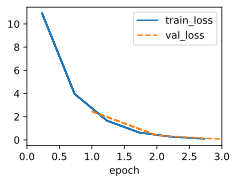

In [106]:
model = d2l.LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [107]:
print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1099, -0.2165], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.2534], grad_fn=<RsubBackward1>)


In [108]:
# More consise implementation of linear regression algorithm
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [112]:
class LinearRegression(d2l.Module):
    
    def __init__(self, lr, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
     
    # for forward permutation of the neural network to make a prediction   
    def forward(self, X):
        return self.net(X)
    
    def loss(self, y, y_hat):
        fn = nn.HuberLoss()
        return fn(y, y_hat)
    
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)
    

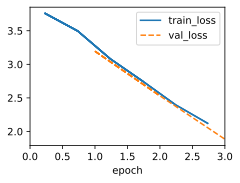

In [113]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [114]:
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)

w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 1.1536, -1.8493])
error in estimating b: tensor([1.8858])


In [122]:
w

tensor([[ 0.8464, -1.5507]])

In [117]:
loss = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
print(input)
target = torch.randn(3, 5)
print(target)
output = loss(input, target)
# output.backward()


tensor([[-0.2067,  0.7318,  0.1499, -0.7855, -0.2321],
        [ 0.3276, -1.7485,  1.1205,  0.3447,  0.1380],
        [ 0.3860,  0.3446, -0.2797,  0.7728,  0.3987]], requires_grad=True)
tensor([[ 1.0010,  0.3766, -0.7853,  3.1575, -1.1145],
        [ 0.5039,  1.3046, -2.0973,  2.2131, -0.0403],
        [-0.5945,  0.6112, -0.2537, -1.0415,  1.7335]])


In [116]:
output

tensor(1.5759, grad_fn=<MseLossBackward0>)

In [118]:
output.backward()

In [119]:
output

tensor(3.2081, grad_fn=<MseLossBackward0>)

In [123]:
# We aim to pick up patterns rather than memorize
# This problem, how to discover patterns that generalize is the fundamental problem of machine learning, and arguably of all of statistics.

# We aim to pick up patterns that generalize
# Due to the limitation in our access to the entire existing data space, we must aim to generalize from our existing dataset



In [124]:
# In a given problem, is it acutally generalizable? Is there a general solution in this problem that can be determined
# techniques for combatting overfitting are often called regularization methods
# Validation and test data is more important in deep neural networks as they enable us better determine generalization

# Increase model complexity to capture the generalization of the problem we are trying to find a pattern for it, i.e. the more complex the pattern, the more complex the model

Typically, we select our final model, only after evaluating multiple models that differ in various ways (different architectures, training objectives, selected features, data preprocessing, learning rates, etc.). Choosing among many models is aptly called model selection.

In [ ]:
# Limiting the number of features can be used to counter overfitting

In [125]:
# working with weight decay
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [131]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise
    
    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)
        

In [132]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

In [133]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) + self.lambd * l2_penalty(self.w))

In [134]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

L2 norm of w: 0.008477406576275826


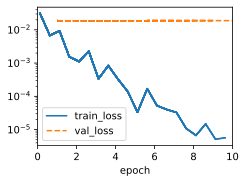

In [135]:
train_scratch(0)

L2 norm of w: 0.0012095628771930933


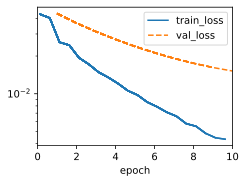

In [136]:
train_scratch(3)

In [137]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

L2 norm of w: 0.0013642075937241316


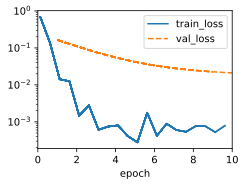

In [142]:
model = WeightDecay(wd=6, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))